In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import pandas as pd
csv_file_path = r"C:\Users\HP\OneDrive\Desktop\ML\archive\Heart_Disease_Prediction.csv"
data = pd.read_csv(csv_file_path)
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [3]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
print(data.shape)
print(data.size)
print(data.columns)

(270, 14)
3780
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [6]:
 features_list = data.columns[0:-1].values
print("List of features :", features_list)
label = [data.columns[-1]]
print("List of label :", label)

List of features : ['Age' 'Sex' 'Chest pain type' 'BP' 'Cholesterol' 'FBS over 120'
 'EKG results' 'Max HR' 'Exercise angina' 'ST depression' 'Slope of ST'
 'Number of vessels fluro' 'Thallium']
List of label : ['Heart Disease']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [10]:
data['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

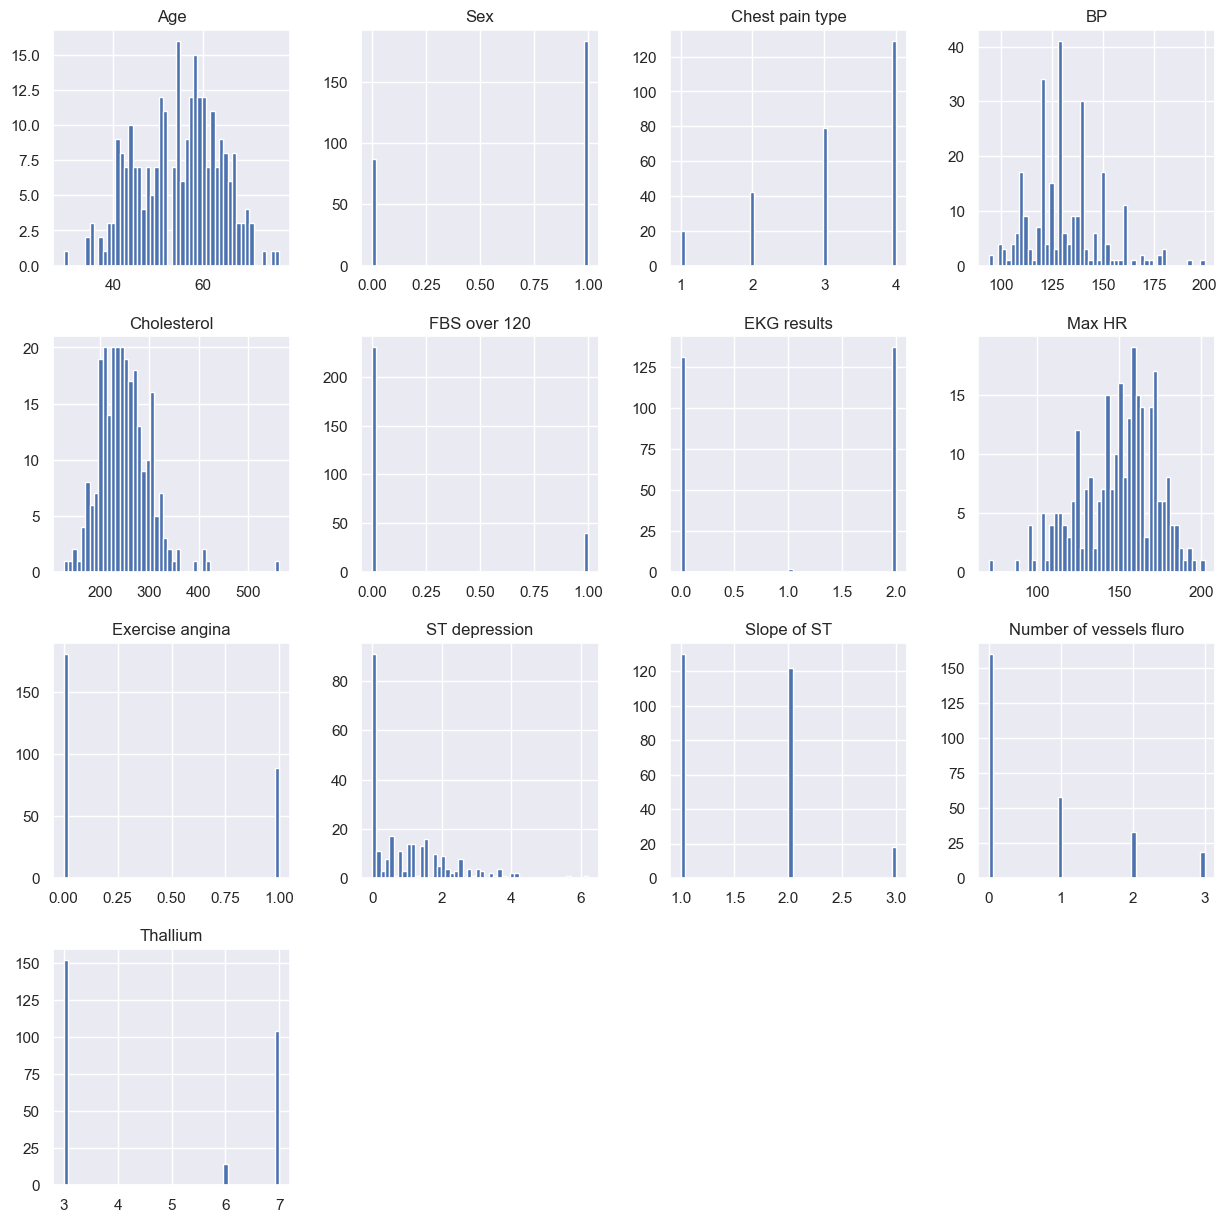

In [11]:
sns.set()
data.hist(bins=50, figsize=(15, 15))
plt.show()

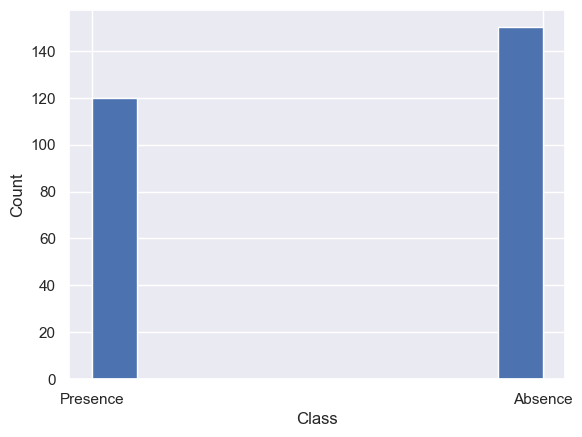

In [12]:
data['Heart Disease'].hist()
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [13]:
corr_matrix = data.corr(method='pearson', min_periods=1, numeric_only=True)
print(corr_matrix)

                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.3

<Axes: >

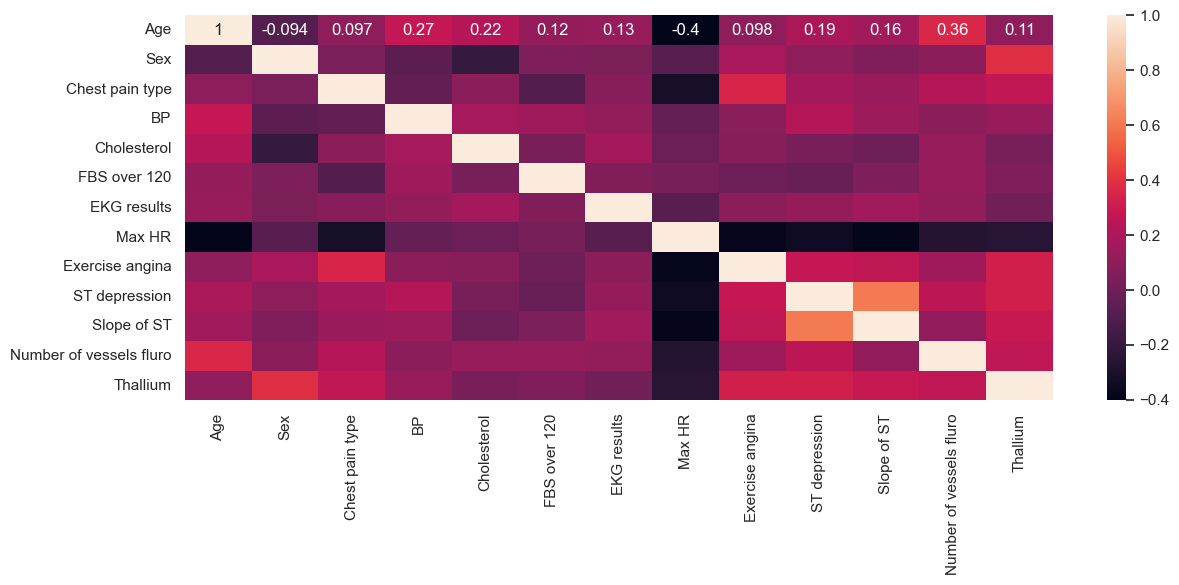

In [14]:
plt.figure(figsize=(14, 5))
sns.heatmap(corr_matrix, annot=True)

In [15]:
X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].copy()
print(X.columns)
print(Y[0:5])

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object


In [16]:
X.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

In [17]:
X.median()

Age                         55.0
Sex                          1.0
Chest pain type              3.0
BP                         130.0
Cholesterol                245.0
FBS over 120                 0.0
EKG results                  2.0
Max HR                     153.5
Exercise angina              0.0
ST depression                0.8
Slope of ST                  2.0
Number of vessels fluro      0.0
Thallium                     3.0
dtype: float64

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=21)

In [19]:
print(X_train.shape, Y_train.shape)

(216, 13) (216,)


In [20]:
print(X_test.shape, Y_test.shape)

(54, 13) (54,)


In [21]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
print(model)

LogisticRegression(max_iter=1000)


In [22]:
model.fit(X_train.values, Y_train.values)

LogisticRegression(max_iter=1000)

In [23]:
Train_Pred = model.predict(X_train.values)
Train_Accur = accuracy_score(Train_Pred, Y_train.values)
print("The training Accuracy : ", Train_Accur)

The training Accuracy :  0.8564814814814815


In [24]:
test_pred = model.predict(X_test.values)
test_acc = accuracy_score(test_pred, Y_test.values)
print("The Test accuracy :", test_acc)

The Test accuracy : 0.8333333333333334


In [25]:
l = model.coef_
l

array([[-0.01700921,  1.03319826,  0.69422135,  0.0201349 ,  0.00331563,
        -0.16327326,  0.27867034, -0.01637509,  0.64357936,  0.38509068,
         0.21452376,  0.93887459,  0.38663706]])

In [26]:
np.mean(l)

0.33858372155450883

In [27]:
model.intercept_


array([-6.83543726])

<Axes: >

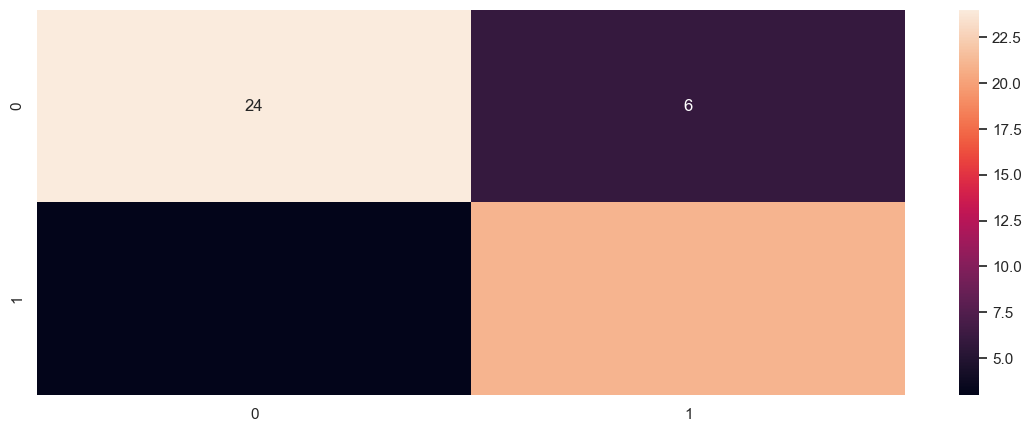

In [28]:
matrix = confusion_matrix(Y_test.values, test_pred)
plt.figure(figsize=(14, 5))
sns.heatmap(matrix, annot=True)

In [29]:
input = np.array([5, 0, 5, 10, 100, 0, 1, 142, 1, 1.1, 2, 0, 8])
input = input.reshape(1, -1)
prediction = model.predict(input)
if prediction[0] == 'Presence':
    print("The Person has a Heart Disease")
else:
    print("The Persion does't have a heart disease")

The Persion does't have a heart disease


In [30]:
input = np.array([50, 0, 5, 100, 300, 0, 1, 142, 1, 1.1, 2, 0, 8])
input = input.reshape(1, -1)
prediction = model.predict(input)
if prediction[0] == 'Presence':
    print("The Person has a Heart Disease")
else:
    print("The Persion does't have a heart disease")

The Person has a Heart Disease


In [31]:
report = classification_report(Y_test.values, test_pred)
print(report)

              precision    recall  f1-score   support

     Absence       0.89      0.80      0.84        30
    Presence       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54

